In [5]:
import matplotlib.pyplot as plt
from astropy.io import fits
import pandas as pd
import numpy as np
import seaborn as sns

# GRB Duration Histograms

As an example of ClassiPyGRB usage to improve workflows and executions, consider the case where you need to make a single histogram of durations on both Swift/BAT and BATSE. As you know, ClassiPyGRB is implemented on the Swift/BAT telescope (at least on its version 1.0), so let's start with the distribution on this telescope:

## Swift/BAT Histogram

One of the options that you can do is to query the summary table from the Swift/BAT telescope and work around it. To use the default summary table from the Swift/BAT telescope, you can use ClassiPyGRB also:

In [2]:
from ClassiPyGRB import SWIFT
swift = SWIFT(n_bands=[1, 2, 3, 4, 5])
df = swift.summary_table()
df = df[['GRBname', 'T90']]
print(df.head())

      GRBname           T90
0  GRB220715B  4.040800e+01
1  GRB220714B  4.904000e+01
2  GRB220711B  8.705600e+01
3  GRB220708A  4.000000e+00
4  GRB220706A  8.599600e+01


Now, you need to remove all the invalid durations from the table and calculate the logarithm of each duration:

In [3]:
# Loop over the rows in the DataFrame and convert the T90 values to floats
for index, row in df.iterrows():
    try:
        df.loc[index, 'T90'] = float(row['T90'])
        df.loc[index, 'log10T90'] = np.log10(float(row['T90']))
    except ValueError:
        # if the T90 value is not a float, set it to NaN
        df.loc[index, 'T90'] = np.nan
        df.loc[index, 'log10T90'] = np.nan
        continue

# drop all rows with NaN values
df = df.dropna()  
print(df.head())

      GRBname     T90  log10T90
0  GRB220715B  40.408  1.606467
1  GRB220714B   49.04  1.690550
2  GRB220711B  87.056  1.939799
3  GRB220708A     4.0  0.602060
4  GRB220706A  85.996  1.934478


And now, make the histogram using Matplotlib and Seaborn:

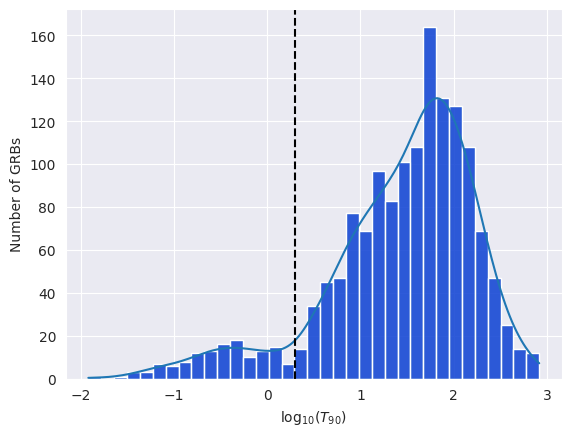

In [4]:
%matplotlib inline
custom_params = {"axes.spines.right": True, "axes.spines.top": True}
fig, ax = plt.subplots(dpi=100)
sns.set_theme(style="ticks", rc=custom_params)
sns.histplot(data=df, x='log10T90', kde=False, bins=35, color="blue", ax=ax)
sns.histplot(data=df, x='log10T90', kde=True, bins=35, ax=ax)
ax.set_xlabel(r'log$_{10}(T_{90})$')
ax.set_ylabel('Number of GRBs')
ax.axvline(x=np.log10(2), color='black', linestyle='--')  # Add a vertical line at T90 = 2 s

# BATSE HISTOGRAM

For the BATSE histogram, you will need to obtain the fits table directly from the BATSE website, as ClassiPyGRB does not have an implementation for this telescope. Then, work around this table:

In [1]:
# Replace '.../BATSE.fits' with the actual path to your FITS file
fits_file = '.../BATSE.fits'

# Read the FITS file and access the data table
with fits.open(fits_file) as hdul:
    data = hdul[1].data

# Convert the data table to a Pandas DataFrame
df = pd.DataFrame(data)
print(df.head())

             NAME         T90
0  4B 951019          8.384\n
1  4B 950225B         0.240\n
2  4B 920502C        73.472\n
3  4B 920517B              \n
4  4B 931017               \n


In [2]:
# Remove the \n from the T90 column
df['t90'] = df['T90'].str.replace('\n', '')
print(df.head())

             NAME         T90       t90
0  4B 951019          8.384\n     8.384
1  4B 950225B         0.240\n     0.240
2  4B 920502C        73.472\n    73.472
3  4B 920517B              \n          
4  4B 931017               \n          


In [3]:
# loop over the rows in the DataFrame
for index, row in df.iterrows():
    try:
        t90 = float(row['t90'])
    except ValueError:
        # if the T90 value is not a float, set it to NaN
        df.loc[index, 't90'] = np.nan
        continue

print(df.head())

             NAME         T90       t90
0  4B 951019          8.384\n     8.384
1  4B 950225B         0.240\n     0.240
2  4B 920502C        73.472\n    73.472
3  4B 920517B              \n       NaN
4  4B 931017               \n       NaN


In [4]:
# drop all rows with NaN values
df = df.dropna()
print(df.head())
print(df.shape)

             NAME         T90       t90
0  4B 951019          8.384\n     8.384
1  4B 950225B         0.240\n     0.240
2  4B 920502C        73.472\n    73.472
5  4B 930619          3.200\n     3.200
6  4B 920120          7.296\n     7.296
(1233, 3)


In [5]:
print(df['t90'].describe())
print(max(df['t90']), min(df['t90']))

count         1233
unique         924
top          0.128
freq            11
Name: t90, dtype: object
 673.824    0.015


In [6]:
# Loop over the rows in the DataFrame and convert the T90 values to floats
for index, row in df.iterrows():
    df.loc[index, 't90'] = float(row['t90'])

# Loop again and estimate log10(T90)
for index, row in df.iterrows():
    df.loc[index, 'log10t90'] = np.log10(row['t90'])

print(df.head())

             NAME         T90     t90  log10t90
0  4B 951019          8.384\n   8.384  0.923451
1  4B 950225B         0.240\n    0.24 -0.619789
2  4B 920502C        73.472\n  73.472  1.866122
5  4B 930619          3.200\n     3.2  0.505150
6  4B 920120          7.296\n   7.296  0.863085


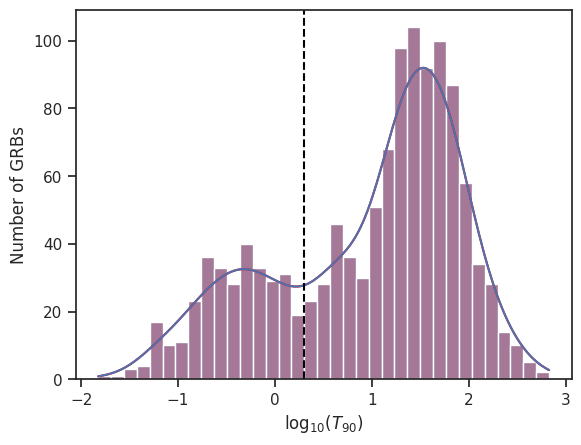

In [7]:
# Plot a histogram of the log10(T90) values using seaborn
custom_params = {"axes.spines.right": True, "axes.spines.top": True}
sns.set_theme(style="ticks", rc=custom_params)
sns.histplot(data=df, x='log10t90', kde=True, bins=35, color="red")
sns.histplot(data=df, x='log10t90', kde=True, bins=35)
plt.xlabel(r'log$_{10}(T_{90})$')
plt.ylabel('Number of GRBs')
# add a vertical line at T90 = 2 s
plt.axvline(x=np.log10(2), color='black', linestyle='--')
# Save the figure
plt.savefig('BATSE_histogram.png', dpi=300, bbox_inches='tight')